<a href="https://colab.research.google.com/github/valeksandrav/PortfolioProjects/blob/main/Python_ABTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data

The game contains a special event - an event, for passing which users can spend money. A group of designers decided to change the appearance of the event purchase window. To evaluate the result of the innovation, they conducted an AB test, dividing users into two groups: control and test (with the new type of window).

Objective

To investigate which of the AB groups performed better.

Columns

AbGroup - name of the AB group: Control/Test

user_id - user id

time_stamp - day of the event

install_date - day of application installation by the user

event_name - technical name of the event (InAppPurchase - in case of purchase for money, ResourceSpend - in case of purchase for game currency)

platform - google / itunes platform

network_name - user installed the game by switching from advertising (Paid) or not (Organic)

country_name - user's country

InGameTime - how many total seconds the user has spent in the game

LastCompletedLevel - number of the last completed level

avg_energy_amount - how much energy the user had on average during the day

revenue_on_event - revenue spent on purchasing event products

revenue_on_other_activities - revenue spent on other products, including gold

gold_on_event - gold spent on event progress

gold_on_other_activities - gold spent on other products

Dataset

https://drive.google.com/file/d/1zzmptalwFufwqI7u6zRLmMUIrK0Ymvp4/view?usp=share_link

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
!gdown --id 1zzmptalwFufwqI7u6zRLmMUIrK0Ymvp4

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zzmptalwFufwqI7u6zRLmMUIrK0Ymvp4
To: /content/test_case_ab_test.csv
100% 102M/102M [00:02<00:00, 38.1MB/s] 


In [3]:
df = pd.read_csv('/content/test_case_ab_test.csv')

In [4]:
df.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


In [5]:
len(df)

696840

In [6]:
df['AbGroup'].value_counts()

Control    558070
Test       138770
Name: AbGroup, dtype: int64

In [7]:
df['AbGroup'].value_counts(normalize=True)

Control    0.800858
Test       0.199142
Name: AbGroup, dtype: float64

In [8]:
df.groupby('AbGroup')['user_id'].agg(['count', 'nunique'])

,count,nunique
AbGroup,,
Control,558070,89034
Test,138770,22278


In [9]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'],format='%Y-%m-%d')

In [10]:
df['install_date'] = pd.to_datetime(df['install_date'],format='%Y-%m-%d')

<Axes: xlabel='time_stamp'>

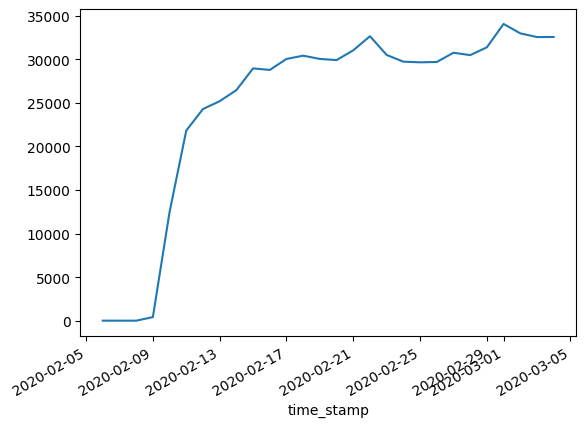

In [11]:
df.groupby('time_stamp')['user_id'].count().plot()

<Axes: xlabel='time_stamp'>

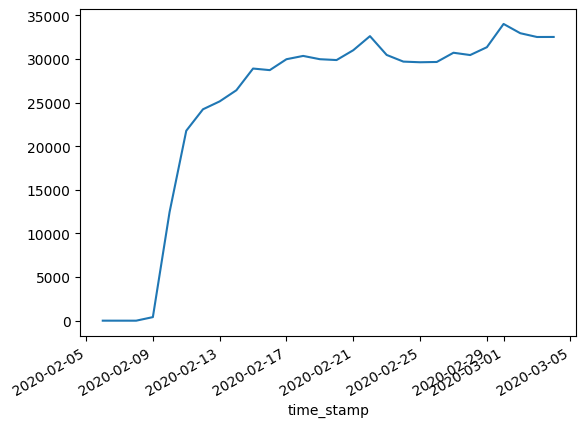

In [12]:
df.groupby('time_stamp')['user_id'].nunique().plot()

In [13]:
df.groupby('time_stamp')['user_id'].agg(['count','nunique'])

,count,nunique
time_stamp,,
2020-02-06,4,3
2020-02-08,1,1
2020-02-09,413,410
2020-02-10,12472,12445
2020-02-11,21822,21767
2020-02-12,24292,24225
2020-02-13,25194,25131
2020-02-14,26464,26407
2020-02-15,28959,28894


<Axes: >

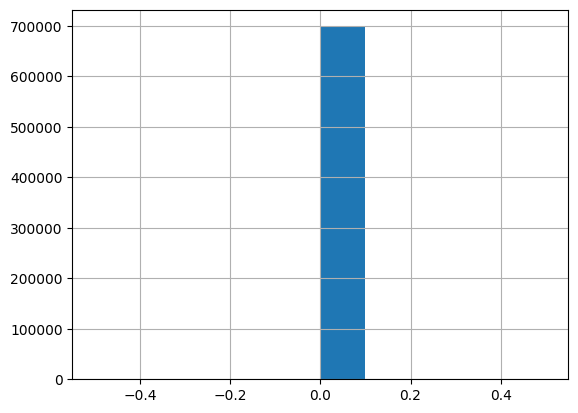

In [14]:
df['revenue_on_event'].hist()

In [15]:
df['revenue_on_event'].value_counts()

0.0    696840
Name: revenue_on_event, dtype: int64

In [16]:
df['revenue_on_event'].describe()

count    696840.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: revenue_on_event, dtype: float64

<Axes: >

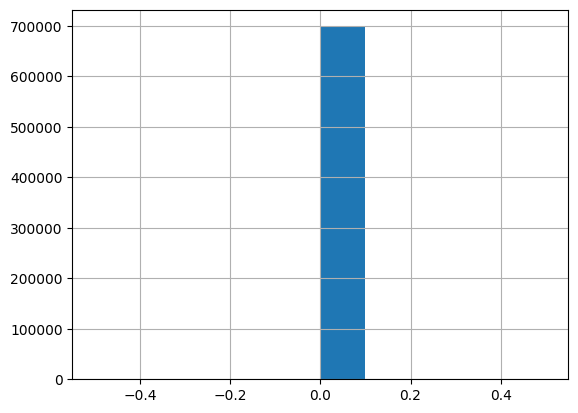

In [17]:
df['revenue_on_other_activities'].hist()

In [18]:
df['revenue_on_other_activities'].describe()

count    696840.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: revenue_on_other_activities, dtype: float64

In [19]:
df.columns

Index(['AbGroup', 'user_id', 'time_stamp', 'install_date', 'event_name',
       'platform', 'network_name', 'country_name', 'InGameTime',
       'LastCompletedLevel', 'avg_energy_amount', 'revenue_on_event',
       'revenue_on_other_activities', 'gold_on_event',
       'gold_on_other_activities'],
      dtype='object')

In [20]:
df[['revenue_on_event',
       'revenue_on_other_activities', 'gold_on_event',
       'gold_on_other_activities']].describe()

,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
count,696840.0,696840.0,45412.000000,168193.000000
mean,0.0,0.0,1992.865322,936.481899
std,0.0,0.0,3895.541280,3522.989145
min,0.0,0.0,500.000000,100.000000
25%,0.0,0.0,500.000000,500.000000
50%,0.0,0.0,1000.000000,600.000000
75%,0.0,0.0,2400.000000,1000.000000
max,0.0,0.0,189600.000000,755950.000000


<Axes: >

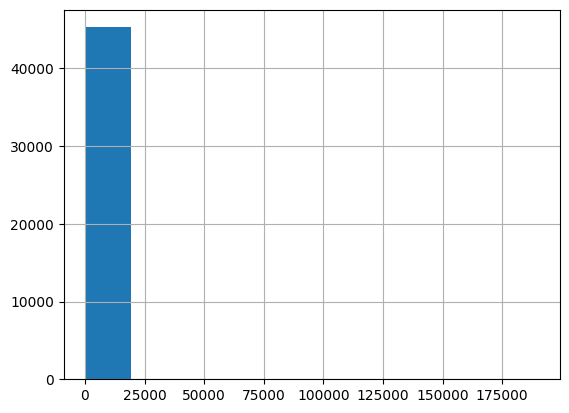

In [21]:
df['gold_on_event'].hist()

<Axes: >

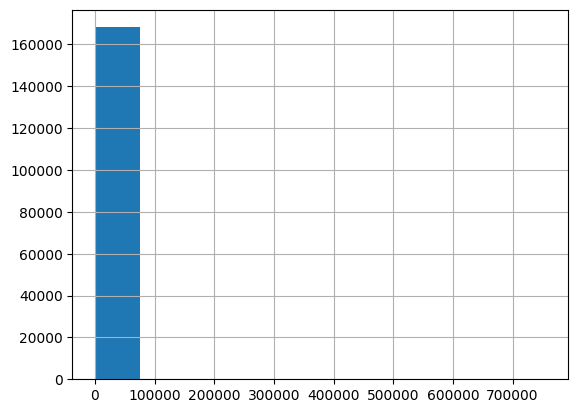

In [22]:
df['gold_on_other_activities'].hist()

In [23]:
df['gold_on_event_flag'] = (df['gold_on_event'] > 0)*1
df['gold_on_other_activities_flag'] = (df['gold_on_other_activities'] > 0)*1

In [24]:
(df.groupby(['AbGroup'])
[['gold_on_event_flag','gold_on_event']]
  .agg({'gold_on_event_flag':['count','mean'],
        'gold_on_event':['mean','median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
AbGroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

In [25]:
t = df.groupby('user_id')['AbGroup'].nunique().reset_index()

In [26]:
t[t['AbGroup'] > 1]

,user_id,AbGroup
202,007a61c7cc84aa559280c6d222aa3e15cb5e0114,2
208,007c891d5eb34c1398966a836d74a123452384de,2
895,02125379d8faf43debf755edfb32758ea5d789d8,2
1097,028e3fc09324ac6df71fccf432dabe44e476956c,2
1107,02977b73d35305fc135ea01bfcc9e1aa334d480a,2
...,...,...
110097,fe08c305b0317eecc6b5cf3cc5362fc912afdc0b,2
110362,fea60891a7ef95c7b95a0b1e58cb9d755684b3de,2
110480,fef449646b98d04def88b9ddb45e7c43bd9a278a,2
110515,ff079e7288b379b4e47650da302a5cc23e8c7ad3,2


In [27]:
t = (df.groupby(['user_id','AbGroup'])
[['gold_on_event_flag','gold_on_event']]
  .agg({'gold_on_event_flag':['count','mean'],
      'gold_on_event':['mean','median']}))

In [28]:
t.columns = ['_'.join(el) for el in t.columns.to_flat_index()]

In [29]:
t['user'] = 1

In [30]:
t.columns

Index(['gold_on_event_flag_count', 'gold_on_event_flag_mean',
       'gold_on_event_mean', 'gold_on_event_median', 'user'],
      dtype='object')

In [31]:
#median cheque per user increased
t.groupby('AbGroup').agg(['count','mean'])

gold_on_event_flag_count           gold_on_event_flag_mean            \
                           count      mean                   count      mean   
AbGroup                                                                        
Control                    89034  6.268055                   89034  0.031600   
Test                       22278  6.229015                   22278  0.030891   

        gold_on_event_mean              gold_on_event_median               \
                     count         mean                count         mean   
AbGroup                                                                     
Control              10685  2119.778819                10685  2002.976135   
Test                  2603  2417.938571                 2603  2296.811371   

          user       
         count mean  
AbGroup              
Control  89034  1.0  
Test     22278  1.0

In [32]:
#base median difference
(df.groupby(['AbGroup'])
[['gold_on_event_flag','gold_on_event']]
  .agg({'gold_on_event_flag':['count','mean'],
        'gold_on_event':['mean','median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
AbGroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

In [33]:
#bootstraping to calculate p-value (median)
group_size = df['AbGroup'].value_counts().values
base_diff = 1500.0 - 1000.0
n = 1000
result = []
for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event'].median()
  b = df.sample(group_size[1],replace=True)['gold_on_event'].median()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [34]:
#probability of getting the same difference is high (probability that the result was random)
np.mean(result)

0.13

In [35]:
#bootstraping to calculate p-value (mean)
group_size = df['AbGroup'].value_counts().values
base_diff = 2104.606505 - 1965.211658
n = 1000
result = []
for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event'].mean()
  b = df.sample(group_size[1],replace=True)['gold_on_event'].mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [36]:
np.mean(result)

0.007

In [37]:
df['gold_on_event_nona'] = df['gold_on_event'].fillna(0)

In [38]:
df.groupby(['AbGroup'])[['gold_on_event_nona']].agg(['mean','median'])

gold_on_event_nona       
                      mean median
AbGroup                          
Control         128.191087    0.0
Test            136.631837    0.0

In [39]:
#bootstraping to calculate p-value (mean without n/a)
group_size = df['AbGroup'].value_counts().values
base_diff = 136.631837 - 128.191087
n = 1000
result = []
for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event_nona'].mean()
  b = df.sample(group_size[1],replace=True)['gold_on_event_nona'].mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [40]:
np.mean(result)

0.009

By checking the median value of gold_on_event median, we found that the average cheque among paying users in each group does not differ.

The mean value of gold_on_event_nona shows that the number of paying users has increased with a 98% probability.